In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import spline
import scipy.stats as stats
from matplotlib.ticker import LinearLocator, FormatStrFormatter

path = 'exp_results/'
VLD = 'valid_accs.npy'
CMP = 'comp_ps.npy'
NONE_RSTV = 'test_none_valid/'
LIST_RSTV = 'test_only_listener_valid/'
SPKE_RSTV = 'test_only_speaker_valid/'
BOTH_RSTV = 'test_both_valid/'
BOTH_RST2V = 'test_both_valid_shortphA/'
BOTH_RST3V = 'test_both_valid_shortphA03/'

In [80]:
VLD_none = np.load(path+NONE_RSTV+VLD).reshape(80,200)
VLD_list = np.load(path+LIST_RSTV+VLD).reshape(80,200)
VLD_spke = np.load(path+SPKE_RSTV+VLD).reshape(80,200)
VLD_both = np.load(path+BOTH_RSTV+VLD).reshape(80,200)
VLD_both2 = np.load(path+BOTH_RST2V+VLD).reshape(80,200)
VLD_both3 = np.load(path+BOTH_RST3V+VLD).reshape(80,200)

CMP_none = np.load(path+NONE_RSTV+CMP).reshape(80,200)
CMP_list = np.load(path+LIST_RSTV+CMP).reshape(80,200)
CMP_spke = np.load(path+SPKE_RSTV+CMP).reshape(80,200)
CMP_both = np.load(path+BOTH_RSTV+CMP).reshape(80,200)
CMP_both2 = np.load(path+BOTH_RST2V+CMP).reshape(80,200)
CMP_both3 = np.load(path+BOTH_RST3V+CMP).reshape(80,200)

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


========For all the data
0.90487006475742 5.552975097450275e-120


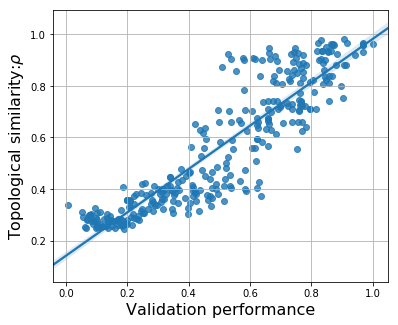

In [81]:
ones = np.ones(CMP_none.mean(1).shape)
zers = np.zeros(CMP_none.mean(1).shape)
valid_all = np.concatenate((VLD_none.mean(1),VLD_both.mean(1),VLD_both2.mean(1),VLD_both3.mean(1)))
comps_all = np.concatenate((CMP_none.mean(1),CMP_both.mean(1),CMP_both2.mean(1),CMP_both3.mean(1)))
itera_all = np.concatenate((zers,ones,ones,ones))

dict_valid_comp = {
    'Validation':valid_all,
    'Rho':comps_all,
    'iter':itera_all
}
df_valid_comp = pd.DataFrame(dict_valid_comp)

f, ax = plt.subplots(figsize=(6,5))
sns.regplot(x="Validation", y="Rho", data=df_valid_comp);

plt.xlabel('Validation performance', fontsize=16)
plt.ylabel('Topological similarity:'+r'$\rho$', fontsize=16)
plt.grid('on')
f.savefig('Figures/Valid_rho_linear.pdf',bbox_inches='tight')

r,p = stats.pearsonr(valid_all, comps_all)
print('========For all the data')
print(r,p)

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


========For all the data
0.90487006475742 5.552975097450275e-120


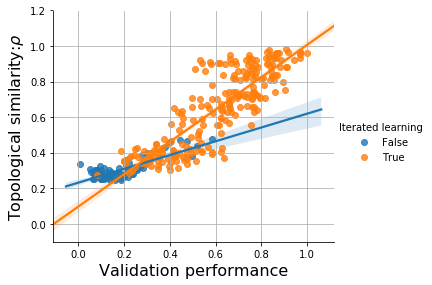

In [91]:
ones = np.ones(CMP_none.mean(1).shape)==1
zers = np.zeros(CMP_none.mean(1).shape)==1
valid_all = np.concatenate((VLD_none.mean(1),VLD_both.mean(1),VLD_both2.mean(1),VLD_both3.mean(1)))
comps_all = np.concatenate((CMP_none.mean(1),CMP_both.mean(1),CMP_both2.mean(1),CMP_both3.mean(1)))
itera_all = np.concatenate((zers,ones,ones,ones))

dict_valid_comp = {
    'Validation':valid_all,
    'Rho':comps_all,
    'Iterated learning':itera_all
}

df_valid_comp = pd.DataFrame(dict_valid_comp)

#f, ax = plt.subplots(figsize=(6,6))
f = sns.lmplot(x="Validation", y="Rho",hue='Iterated learning',truncate=False, data=df_valid_comp,height=4,aspect=1.2);


plt.xlabel('Validation performance', fontsize=16)
plt.ylabel('Topological similarity:'+r'$\rho$', fontsize=16)
plt.grid('on')
f.savefig('Figures/Valid_rho_linear02.pdf',bbox_inches='tight')
r,p = stats.pearsonr(valid_all, comps_all)
print('========For all the data')
print(r,p)

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


========For Ia is 1500
0.6187484061447596 9.547240017738413e-10
========For Ia is 600
0.7001870202518102 4.9017193107021e-13
========For Ia is 120
0.3996495905891083 0.00024008354409955465
========For None
0.7903971673538954 2.8377004541018898e-18


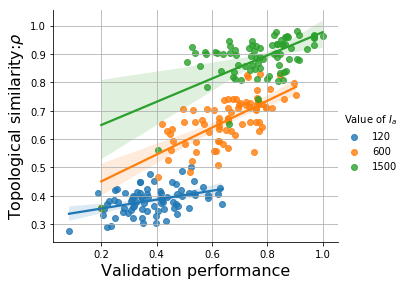

In [83]:
ones = np.ones(CMP_none.mean(1).shape,dtype=int)
zers = np.zeros(CMP_none.mean(1).shape,dtype=int)
valid_all = np.concatenate((VLD_both.mean(1),VLD_both2.mean(1),VLD_both3.mean(1)))
comps_all = np.concatenate((CMP_both.mean(1),CMP_both2.mean(1),CMP_both3.mean(1)))
itera_all = np.concatenate((ones*1500,ones*600,ones*120))

dict_valid_comp = {
    'Validation':valid_all,
    'Rho':comps_all,
    'Value of '+r'$I_a$':itera_all
}

df_valid_comp = pd.DataFrame(dict_valid_comp)

#f, ax = plt.subplots(figsize=(6,6))
f = sns.lmplot(x="Validation", y="Rho",hue='Value of '+r'$I_a$',truncate=True, data=df_valid_comp,height=4,aspect=1.2);


plt.xlabel('Validation performance', fontsize=16)
plt.ylabel('Topological similarity:'+r'$\rho$', fontsize=16)
plt.grid('on')
f.savefig('Figures/Valid_rho_linear03.pdf',bbox_inches='tight')

r,p = stats.pearsonr(VLD_both.mean(1), CMP_both.mean(1))
print('========For Ia is 1500')
print(r,p)
r,p = stats.pearsonr(VLD_both2.mean(1), CMP_both2.mean(1))
print('========For Ia is 600')
print(r,p)
r,p = stats.pearsonr(VLD_both3.mean(1), CMP_both3.mean(1))
print('========For Ia is 120')
print(r,p)
r,p = stats.pearsonr(VLD_none.mean(1), CMP_none.mean(1))
print('========For None')
print(r,p)

In [84]:
r,p = stats.pearsonr(valid_all, comps_all)
print(r,p)

0.8576783273270928 1.0616169897531493e-70


In [85]:
path = 'exp_results/'
RWD = 'rewards.npy'
MST = 'msg_types.npy'
NONE_RST = 'test_none_reset/'
LIST_RST = 'test_only_listener_reset/'
SPKE_RST = 'test_only_speaker_reset/'
BOTH_RST = 'test_both_spk_and_lis/'

def smooth_rwd(rwd,ratio=10):
    new_rwd = np.zeros(rwd.shape)
    tmp = rwd[0]
    for i in range(rwd.size):
        tmp = (1-1/ratio)*tmp + 1/ratio*rwd[i]
        new_rwd[i] = tmp
    return new_rwd

In [86]:
SMOOTH_RATIO=2
MST_none = np.load(path+NONE_RSTV+MST).reshape(80,-1)
MST_list = np.load(path+LIST_RSTV+MST).reshape(80,-1)
MST_spke = np.load(path+SPKE_RSTV+MST).reshape(80,-1)
MST_both = np.load(path+BOTH_RSTV+MST).reshape(80,-1)

MST_none_avg = smooth_rwd(np.average(MST_none,axis=1),SMOOTH_RATIO)
MST_list_avg = smooth_rwd(np.average(MST_list,axis=1),SMOOTH_RATIO)
MST_spke_avg = smooth_rwd(np.average(MST_spke,axis=1),SMOOTH_RATIO)
MST_both_avg = smooth_rwd(np.average(MST_both,axis=1),SMOOTH_RATIO)

MST_none_std = smooth_rwd(MST_none.std(1), SMOOTH_RATIO)
MST_list_std = smooth_rwd(MST_list.std(1), SMOOTH_RATIO)
MST_spke_std = smooth_rwd(MST_spke.std(1), SMOOTH_RATIO)
MST_both_std = smooth_rwd(MST_both.std(1), SMOOTH_RATIO)

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


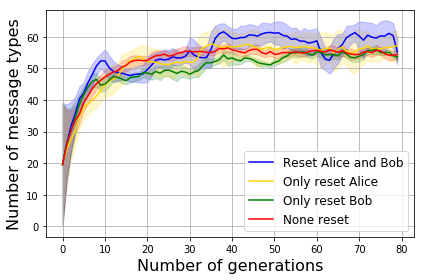

In [90]:
fig_comp = plt.figure(figsize=(6,4))
ax = fig_comp.add_subplot(1,1,1)

x = np.arange(0,MST_none_std.shape[0])
ax.plot(x, MST_both_avg, color='blue',label='Reset Alice and Bob')
ax.plot(x, MST_spke_avg, color='gold',label='Only reset Alice')
ax.plot(x, MST_list_avg, color='green',label='Only reset Bob')
ax.plot(x, MST_none_avg, color='red',label='None reset')

ax.fill_between(x, MST_none_avg - 2*MST_none_std, MST_none_avg+2*MST_none_std, color='red', alpha=0.2)
ax.fill_between(x, MST_list_avg - 2*MST_list_std, MST_list_avg+2*MST_list_std, color='green', alpha=0.2)
ax.fill_between(x, MST_spke_avg - 2*MST_spke_std, MST_spke_avg+2*MST_spke_std, color='gold', alpha=0.2)
ax.fill_between(x, MST_both_avg - 2*MST_both_std, MST_both_avg+2*MST_both_std, color='blue', alpha=0.2)

plt.xlabel('Number of generations',fontsize=16)
plt.ylabel('Number of message types',fontsize=16)

#plt.ylim(0,0.92)
ax.legend(fontsize=12)
ax.grid('on')

fig_comp.tight_layout()
fig_comp.savefig('Figures/Msg_types_compare.pdf')

In [88]:
tips = sns.load_dataset("tips")

In [89]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
